# EDAのノートブック

In [1]:
import sys
import os
from pathlib import Path

sys.path.append(os.path.join(Path().resolve(), '..'))

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

from utils.utils import make_datapath_list

### 画像ファイル取得

In [2]:
datapath = "../data/"
train_files = make_datapath_list(os.path.join(datapath, "train"))
test_files = make_datapath_list(os.path.join(datapath, "test"))

../data/train/**/*.tif
../data/test/**/*.tif


### 試しに訓練の1枚目のshapeと画像を表示

(1024, 1024, 3)


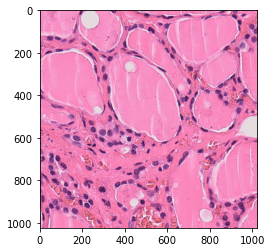

In [3]:
img = Image.open(train_files[0])
img = np.array(img)
print(img.shape)
plt.imshow(img)

### ファイル名から画像に変換する関数

In [4]:
def file2img(files, gray=False):
    if gray:
        imgs = np.empty([0, 224, 224])
    else:
        imgs = np.empty([0, 224, 224, 3])
    for file in tqdm(files, total=len(files)):
        img = Image.open(file)
        img = img.resize((224,224))
        if gray:
            img = img.convert('L')
            img = np.array(img)[np.newaxis, :, :]
        else:
            img = np.array(img)[np.newaxis, :, :, :]
        imgs = np.vstack([imgs, img])
    return imgs

### 訓練、テスト、tissue画像を取得

In [5]:
train_imgs = file2img(train_files)
print(train_imgs.shape)

 16%|█▌        | 891/5556 [01:08<05:56, 13.10it/s]


KeyboardInterrupt: 

In [ ]:
test_imgs = file2img(test_files)
print(test_imgs.shape)

In [ ]:
tissue_files = make_datapath_list("../data/tissue array/")
tissue_imgs = file2img(tissue_files)
print(tissue_imgs.shape)

### それぞれのrgbの平均値を取得

In [8]:
train_mean = train_imgs.mean(axis=(0, 1, 2))
test_mean = test_imgs.mean(axis=(0, 1, 2))
tissue_mean = tissue_imgs.mean(axis=(0, 1, 2))

print("train_mean(r,g,b):", train_mean)
print("test_mean(r,g,b):", test_mean)
print("tissue_mean(r,g,b):", tissue_mean)

train_mean(r,g,b): [220.67839587 141.56012084 185.39535797]
test_mean(r,g,b): [217.72022829 148.6272695  190.4794914 ]
tissue_mean(r,g,b): [186.08429619 147.84833212 186.99330744]


### それぞれのrgbの標準偏差を取得

In [9]:
train_std = train_imgs.std(axis=(0, 1, 2))
test_std = test_imgs.std(axis=(0, 1, 2))
tissue_std = tissue_imgs.std(axis=(0, 1, 2))

print("train_std(r,g,b):", train_std)
print("test_std(r,g,b):", test_std)
print("tissue_std(r,g,b):", tissue_std)

train_std(r,g,b): [38.92027636 47.14897169 31.08284294]
test_std(r,g,b): [35.10429153 46.84257875 28.5777418 ]
tissue_std(r,g,b): [46.73657451 55.929303   37.48811194]


utils.pyのImageTransform用に0~1に正規化後の平均と標準偏差を計算

In [10]:
normalizer = MinMaxScaler()
train_imgs_normalize = normalizer.fit_transform(train_imgs.reshape(-1, 3))
test_imgs_normalize = normalizer.fit_transform(test_imgs.reshape(-1, 3))
tissue_imgs_normalize = normalizer.fit_transform(tissue_imgs.reshape(-1, 3))

train_normalize_mean = train_imgs_normalize.mean(axis=0)
test_normalize_mean = test_imgs_normalize.mean(axis=0)
tissue_normalize_mean = tissue_imgs_normalize.mean(axis=0)

print("train_normalize_mean(r,g,b):", train_normalize_mean)
print("test_normalize_mean(r,g,b):", test_normalize_mean)
print("tissue_normalize_mean(r,g,b):", tissue_normalize_mean)

train_normalize_std = train_imgs_normalize.std(axis=0)
test_normalize_std = test_imgs_normalize.std(axis=0)
tissue_normalize_std = tissue_imgs_normalize.std(axis=0)

print("train_normalize_std(r,g,b):", train_normalize_std)
print("test_normalize_std(r,g,b):", test_normalize_std)
print("tissue_normalize_std(r,g,b):", tissue_normalize_std)

train_normalize_mean(r,g,b): [0.86540548 0.55513773 0.72704062]
test_normalize_mean(r,g,b): [0.85380482 0.58285204 0.7469784 ]
tissue_normalize_mean(r,g,b): [0.72433718 0.57979738 0.72466926]
train_normalize_std(r,g,b): [0.15262853 0.18489793 0.1218935 ]
test_normalize_std(r,g,b): [0.13766389 0.18369639 0.11206958]
tissue_normalize_std(r,g,b): [0.1869463  0.2193306  0.15177373]


In [6]:
train_imgs = file2img(train_files, gray=True)
print(train_imgs.shape)

100%|██████████| 5556/5556 [13:04<00:00,  7.08it/s]

(5556, 224, 224)


In [7]:
test_imgs = file2img(test_files, gray=True)
print(test_imgs.shape)

100%|██████████| 1550/1550 [01:18<00:00, 19.76it/s]

(1550, 224, 224)


In [8]:
tissue_files = make_datapath_list("../data/tissue array/")
tissue_imgs = file2img(tissue_files, gray=True)
print(tissue_imgs.shape)

  2%|▏         | 12/638 [00:00<00:05, 119.06it/s]

../data/tissue array//**/*.tif


100%|██████████| 638/638 [00:14<00:00, 43.84it/s]

(638, 224, 224)


### それぞれの平均値を取得

In [9]:
train_mean = train_imgs.mean()
test_mean = test_imgs.mean()
tissue_mean = tissue_imgs.mean()

print("train_mean(gray):", train_mean)
print("test_mean(gray):", test_mean)
print("tissue_mean(gray):", tissue_mean)

train_mean(gray): 170.21373459088514
test_mean(gray): 174.0568804389195
tissue_mean(gray): 163.7386785661806


### それぞれの標準偏差を取得

In [10]:
train_std = train_imgs.std()
test_std = test_imgs.std()
tissue_std = tissue_imgs.std()

print("train_std(gray):", train_std)
print("test_std(gray):", test_std)
print("tissue_std(gray):", tissue_std)

train_std(gray): 39.807608401739635
test_std(gray): 38.86325282881261
tissue_std(gray): 50.04149583036516


utils.pyのImageTransform用に0~1に正規化後の平均と標準偏差を計算

In [11]:
normalizer = MinMaxScaler()
train_imgs_normalize = normalizer.fit_transform(train_imgs.reshape(-1, 1))
test_imgs_normalize = normalizer.fit_transform(test_imgs.reshape(-1, 1))
tissue_imgs_normalize = normalizer.fit_transform(tissue_imgs.reshape(-1, 1))

train_normalize_mean = train_imgs_normalize.mean()
test_normalize_mean = test_imgs_normalize.mean()
tissue_normalize_mean = tissue_imgs_normalize.mean()

print("train_normalize_mean(gray):", train_normalize_mean)
print("test_normalize_mean(gray):", test_normalize_mean)
print("tissue_normalize_mean(gray):", tissue_normalize_mean)

train_normalize_std = train_imgs_normalize.std()
test_normalize_std = test_imgs_normalize.std()
tissue_normalize_std = tissue_imgs_normalize.std()

print("train_normalize_std(gray):", train_normalize_std)
print("test_normalize_std(gray):", test_normalize_std)
print("tissue_normalize_std(gray):", tissue_normalize_std)

train_normalize_mean(gray): 0.6675048415328768
test_normalize_mean(gray): 0.6825760017212497
tissue_normalize_mean(gray): 0.6392833144908318
train_normalize_std(gray): 0.15610826824211674
test_normalize_std(gray): 0.1524049130541671
tissue_normalize_std(gray): 0.19779247363780633


### 試しに訓練の1枚目のグレースケール画像を表示
### 背景領域と組織領域を分離したい

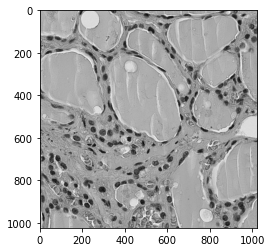

In [11]:
train_exp = Image.open(train_files[0])
train_exp_gray = train_exp.convert("L")  # グレースケール変換
plt.imshow(train_exp_gray, cmap="gray")